In [1]:
from scipy.io import arff
from operator import index

import numpy as np
from sklearn.neighbors import NearestNeighbors, KernelDensity
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import gaussian_kde
import seaborn as sns
from sklearn import preprocessing
import math

from statsmodels.sandbox.panel.sandwich_covariance_generic import kernel

plt.rcParams['figure.figsize'] = [15, 7]

In [2]:
df = pd.read_csv("./outlierDatasets/synthetic.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,outlier
0,0.435518,0.038492,0.551343,0.140049,0.899545,0.588684,0.299706,0.245713,0.367375,0.452970,no
1,0.633197,0.034490,0.319406,0.879141,0.163079,0.184356,0.160583,0.104973,0.294980,0.429709,no
2,0.421558,0.299824,0.602220,0.521654,0.954621,0.547448,0.882898,0.586641,0.840204,0.212529,no
3,0.817491,0.647528,0.046214,0.487270,0.053872,0.817499,0.390589,0.394750,0.736854,0.442689,yes
4,0.291513,0.474018,0.065267,0.410573,0.903696,0.466520,0.196878,0.165370,0.297764,0.467911,no


In [6]:
X = df.iloc[:,4:6].values
y = df["outlier"].values

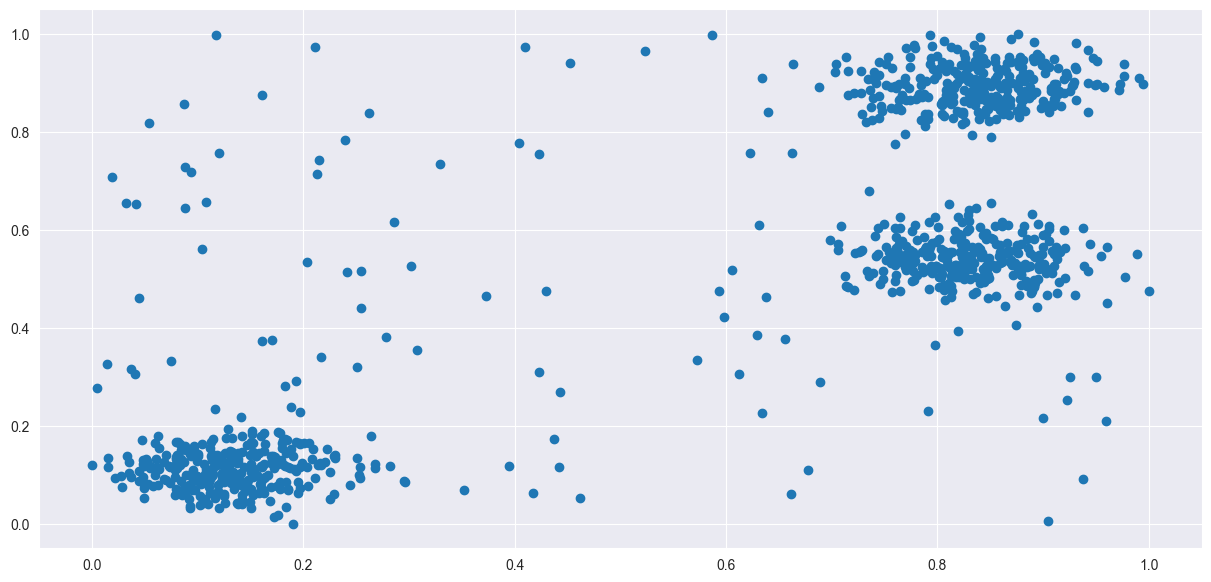

In [7]:
plt.scatter(X[:,0],X[:,1])

In [8]:
[[0,1],[0,1]]

1.0
